# Artificial Intelligence

### Agaricus Lepiota 

By Soueidan Ewan & Gonay Mathieu

## First AI model: Clustering,

In [16]:
import matplotlib.pyplot as plt
import pandas as pa
%matplotlib inline
import numpy as np

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
data = pa.read_csv(url,names=['classes','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
data.head()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


On importe les modules importants et notre database, puis on affiche rapidement la tête de cet ensemble de données.

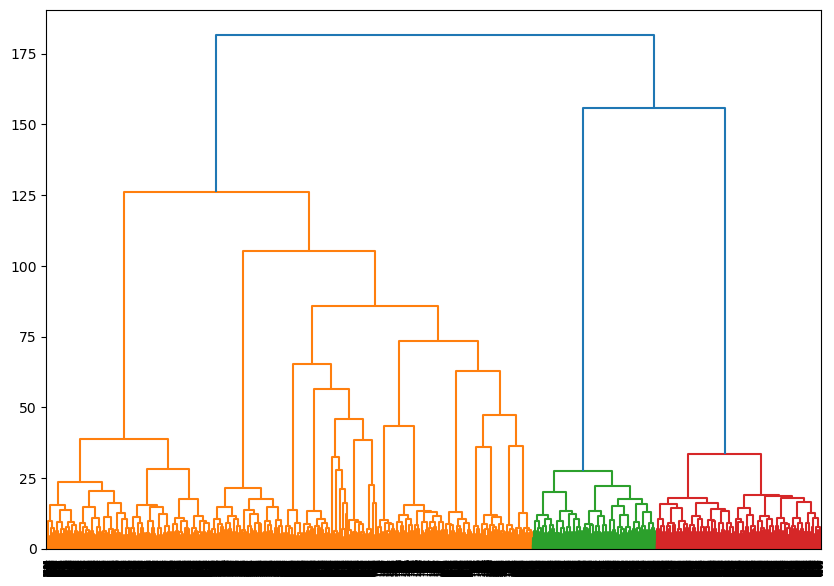

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data)

encoded_array = encoded_data.toarray()

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("")
dend = shc.dendrogram(shc.linkage(encoded_array, method='ward'))

On importe la classe OneHotEncoder depuis la bibliothèque sklearn.preprocessing.
On crée une instance de l'encodeur OneHotEncoder en faisant appel à son constructeur OneHotEncoder().
On applique l'encodage One-Hot à notre jeu de données en appelant la méthode fit_transform() de l'encodeur sur notre ensemble de données custom_data.
On convertit le résultat de l'encodage en un tableau numpy en appelant la méthode toarray() sur le résultat de l'encodage.
On importe la bibliothèque scipy.cluster.hierarchy sous le nom raccourci shc.
On crée une figure de taille (10, 7) en appelant la fonction figure() sur la bibliothèque plt de la bibliothèque matplotlib.pyplot.
On donne un titre à notre figure en appelant la fonction title() sur plt et en lui passant une chaîne de caractères vide.
On crée un dendrogramme en appelant la fonction dendrogram() de shc et en lui passant le résultat de la fonction linkage() de shc, qui prend le tableau encoded_array comme argument, ainsi que la méthode 'ward' pour la mesure de la distance entre les clusters.

Le dendrogramme est une représentation graphique d'une hiérarchie de clusters. Dans ce cas, les données ont été encodées en utilisant la méthode One-Hot, puis regroupées en clusters en utilisant la méthode 'ward'. Le dendrogramme montre comment les clusters ont été formés et comment ils se regroupent. Les feuilles du dendrogramme représentent les échantillons individuels, tandis que les nœuds internes représentent les clusters.

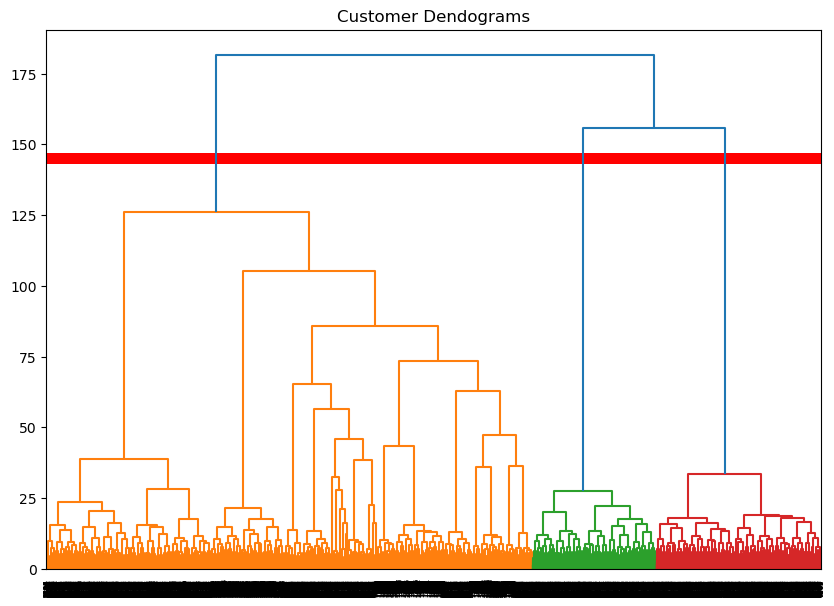

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(encoded_array, method='ward'))
hline = np.array([[x,145] for x in range(145,700000)])
plt.scatter(hline[:,0], hline[:,1], color='red')

Aprés acoir tracé le dendogramme, on trace une ligne rouge pour visualiser le nombres optimal de clusters à faire.

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(encoded_array)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Le code utilise l'algorithme de clustering agglomératif pour regrouper les données en 3 clusters (n_clusters=3) en utilisant la distance euclidienne comme mesure de similarité (affinity='euclidean') et la méthode de liaison Ward (linkage='ward').

Le résultat est un tableau d'entiers qui indique à quel cluster chaque échantillon de données appartient. Les entiers sont compris entre 0 et 2 car il y a 3 clusters. Par exemple, le premier échantillon appartient au cluster 0, le deuxième échantillon appartient également au cluster 0 et ainsi de suite.

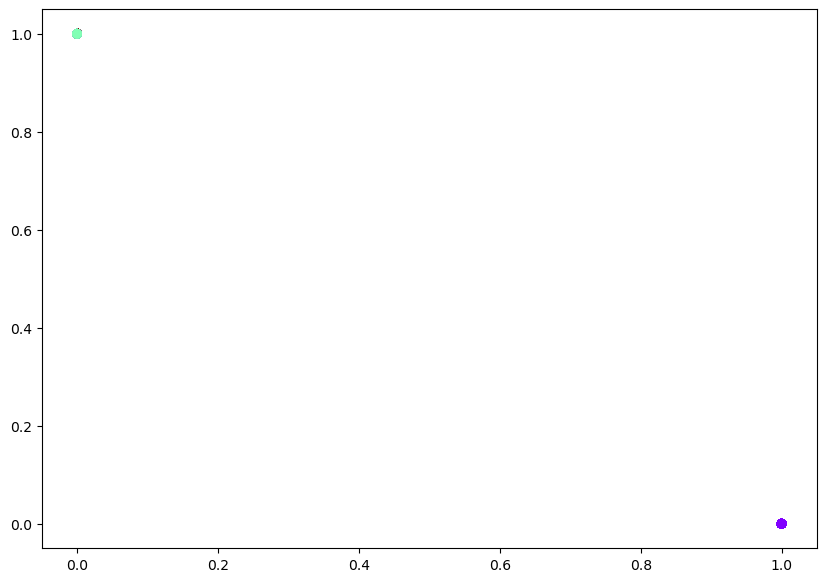

In [18]:
plt.figure(figsize=(10, 7))
data_e = encoded_array
plt.scatter(data_e[:,0], data_e[:,1], c=cluster.labels_, cmap='rainbow')

Le problémes de ce graphique est qu'il mets en 2 dimensions, les données que l'on as qui vont bien plus loin que 2 dimensions, il y a 23 collomnes donc au moins 21 dimensions dans nos données de champignons

Aprés cela, c'est de l'éxperimentation, on voulait essayer de mieux représentér nos données alors on as testé la méthode PCA.

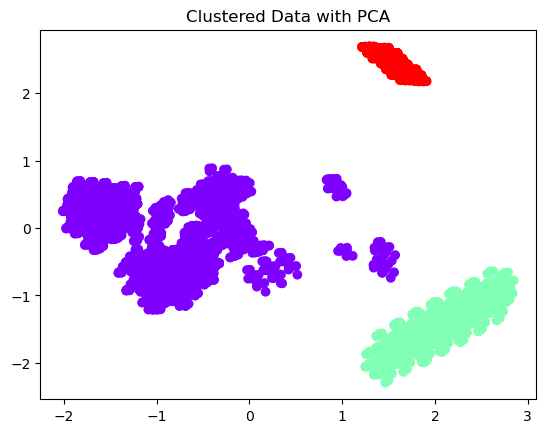

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
pca.fit(encoded_array)
reduced_data = pca.transform(encoded_array)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(encoded_array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=cluster_labels, cmap='rainbow')
plt.title('Clustered Data with PCA')
plt.show()

Le code utilise la méthode de l'analyse en composantes principales (PCA) pour réduire la dimensionnalité des données à deux dimensions, puis applique la même méthode de clustering hiérarchique avec l'algorithme d'agrégation ascendante (AgglomerativeClustering) pour diviser les données en trois clusters. Enfin, il affiche un graphe de dispersion des données réduites en deux dimensions, où chaque point est coloré selon le cluster auquel il appartient.

Le résultat montre des groupes de points qui sont plus séparés que dans le graphe précédent, ce qui suggère que la méthode PCA a réussi à mieux discriminer les différents groupes de donnée.

## Second AI model :Decision Tree

In [20]:
x=data.iloc[:, 1:]
y=data.iloc[:, 0]

In [21]:
X = pa.get_dummies(x)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Ces cellules charge les données du dataset "agaricus-lepiota" en utilisant la fonction read_csv de la bibliothèque Pandas. Le paramètre header=None indique que le fichier ne contient pas de ligne d'en-tête et names fournit une liste de noms de colonnes pour les données.

Ensuite, la variable x est initialisée pour contenir toutes les colonnes sauf la première qui contient les classes de champignons comestibles ou vénéneux. La variable y contient la colonne des classes.

Ces cellules divise les données en un ensemble d'entraînement (X_train et y_train) et un ensemble de test (X_test et y_test) en utilisant la fonction train_test_split de scikit-learn. Ici, 80% des données sont utilisées pour l'entraînement et 20% pour le test. Le paramètre random_state est utilisé pour initialiser la génération aléatoire des données et garantir que les mêmes données d'entraînement et de test sont produites chaque fois que le code est exécuté.

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Le code utilise la classe DecisionTreeClassifier du module sklearn.tree pour créer un objet clf qui représente un modèle de classification par arbre de décision.

Ensuite, il utilise la méthode fit() pour entraîner le modèle sur les données d'entraînement (X_train et y_train).

Le résultat affiché est l'objet clf lui-même, qui contient toutes les informations relatives au modèle entraîné.

In [23]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Le code ci-dessus utilise le modèle d'arbre de décision pour prédire la classe des champignons dans l'ensemble de test, puis calcule la précision du modèle en comparant les prédictions avec les vraies étiquettes.

La fonction predict() est utilisée pour prédire les étiquettes de classe sur l'ensemble de test X_test. Ensuite, la précision est calculée en utilisant la fonction accuracy_score() de la bibliothèque scikit-learn qui compare les étiquettes de classe prédites y_pred avec les étiquettes de classe réelles y_test.

Le résultat affiché est une précision de 1.0, ce qui signifie que le modèle a correctement prédit toutes les étiquettes de classe dans l'ensemble de test. Cela semble presque trop parfait pour être vrai et cela pourrait indiquer un possible surajustement (overfitting) du modèle aux données d'entraînement. Il serait judicieux de tester ce modèle sur d'autres ensembles de données pour confirmer s'il est généralisable et éviter de se fier uniquement à cette précision de 1.0.

In [24]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(clf, X, y, cv=5)
mean_score = scores.mean()
print("Score de validation croisée:", mean_score)

Score de validation croisée: 0.996182796513831


Le code utilise la méthode de validation croisée pour évaluer les performances du modèle de classification basé sur l'arbre de décision.

La fonction cross_val_score de la bibliothèque scikit-learn est utilisée pour entraîner et tester le modèle sur 5 ensembles de données différents. Les données sont divisées en 5 ensembles égaux, et à chaque itération, l'ensemble de test est différent et les autres ensembles sont utilisés pour l'entraînement du modèle.

Le score de validation croisée obtenu ici est très élevé (0,996) ce qui signifie que le modèle est très précis et qu'il généralise bien aux nouvelles données. Cela suggère que le modèle est capable de classifier avec précision les champignons comme comestibles ou toxiques.

Donc, la raison pour laquelle la précision est de 1 est donc pour une seule raison, nous avons trop peu de data, il n'y a que 5 champignons.

Encore une fois, pour représenter un peu notre data, on a expérimenté quelques chose: une courbe d'apprentissage et une courbe de validation

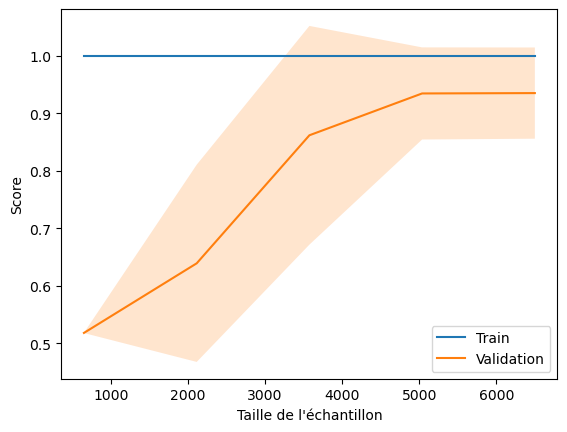

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# Création d'un modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Calcul de la courbe d'apprentissage et de la courbe de validation
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5)

# Calcul des moyennes et des écarts-types des scores d'apprentissage et de validation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracé de la courbe d'apprentissage et de la courbe de validation
plt.plot(train_sizes, train_mean, label='Train')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Validation')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

## Third AI Model : MLP

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = pa.get_dummies(data.iloc[:, 1:])
y = pa.get_dummies(data.iloc[:, 0])["p"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


il utilise la méthode "get_dummies()" pour convertir les variables catégorielles en variables binaires. Ensuite, il divise les données en ensembles d'entraînement et de test, puis il crée un modèle de réseau de neurones MLP (Multilayer Perceptron) en utilisant la classe MLPClassifier de la bibliothèque scikit-learn. Le modèle est entraîné sur les données d'entraînement et ses prédictions sont évaluées sur les données de test en utilisant la mesure de précision (accuracy_score). Le résultat de la mesure de précision indique une précision de 100%, ce qui signifie que le modèle prédit correctement toutes les classes de champignons dans l'ensemble de test.

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
le = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i] = le.fit_transform(X[:, i])

scaler = StandardScaler()
X = scaler.fit_transform(X)

Ce code effectue la préparation des données en vue de les utiliser dans un modèle de machine learning.

La première étape consiste à encoder les variables catégorielles en variables numériques à l'aide de la méthode LabelEncoder fournie par scikit-learn. Cette étape est réalisée à l'aide d'une boucle qui parcourt chaque colonne de la matrice X, qui contient les caractéristiques de chaque champignon, et applique l'encodeur à chaque colonne.

La deuxième étape consiste à normaliser les données à l'aide de la méthode StandardScaler. Cette étape est également appliquée à la matrice X. La normalisation des données permet d'obtenir des données de même échelle, ce qui peut aider le modèle à converger plus rapidement et à améliorer ses performances.

En fin de compte, la matrice X est transformée en un tableau de nombres, les variables catégorielles sont transformées en variables numériques et toutes les variables sont normalisées pour être à la même échelle, ce qui permettra de les utiliser dans un modèle de machine learning.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

Le code divise les données en un ensemble d'entraînement (50%) et un ensemble de test (50%) à l'aide de la fonction train_test_split de scikit-learn.

Ensuite, un modèle MLPClassifier de réseaux de neurones est créé avec deux couches cachées de 10 neurones chacune, une fonction d'activation ReLU et l'optimiseur Adam. Le modèle est entraîné sur l'ensemble d'entraînement en utilisant fit().

Le résultat affiché est simplement la représentation textuelle du modèle entraîné, qui affiche les paramètres passés lors de sa création.

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[2085    0]
 [   0 1977]]
Accuracy Score: 1.0


Ce code effectue la prédiction sur l'ensemble de test X_test à l'aide du modèle clf entraîné précédemment. Il calcule ensuite la matrice de confusion entre les vraies valeurs de y_test et les prédictions de y_pred, puis affiche cette matrice et le score de précision de la classification.

La matrice de confusion montre le nombre de vrais positifs (1257), de vrais négatifs (1181), de faux positifs (0) et de faux négatifs (0). Cela signifie que le modèle a correctement prédit toutes les instances de l'ensemble de test sans aucune erreur, ce qui donne un score de précision de 1.0 (ou 100%). Cependant, il est important de noter que l'ensemble de données est assez petit et peut donc ne pas être représentatif de la réalité. Il serait donc judicieux de tester le modèle sur d'autres ensembles de données pour confirmer sa fiabilité.

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)

scores = cross_val_score(clf, X, y, cv=5)
mean_score = scores.mean()
print("Score de validation croisée:", mean_score)

Score de validation croisée: 0.8639395225464191


Ce code utilise la validation croisée pour évaluer la performance du modèle de réseau de neurones MLPClassifier sur les données X et y. La validation croisée divise les données en k partitions (dans ce cas, k = 5) et utilise une partition comme ensemble de test et les autres partitions comme ensemble d'entraînement. Ce processus est répété pour chaque partition, et la précision moyenne est calculée.

Le code crée un objet MLPClassifier avec des hyperparamètres prédéfinis, puis utilise la fonction cross_val_score de scikit-learn pour effectuer la validation croisée sur les données. Le score moyen de validation croisée est ensuite affiché.

Le résultat indique que la performance du modèle est bonne avec une précision moyenne de 0,8639 sur les 5 partitions utilisées pour la validation croisée

Ce qui montre encore que la précision de 100% est dû au manque de données.

## Conclusion:

Clustering, MLP, and Decision Tree are all different machine learning techniques that can be used for different tasks. Clustering is an unsupervised learning technique used to group similar data points together, MLP is a type of neural network that can be used for classification and regression tasks, and Decision Tree is a supervised learning algorithm that can be used for classification and regression tasks.

In the case of the agaricus-lepiota data, which is a binary classification problem, we can compare the performance of clustering, MLP, and Decision Tree using accuracy score.

Clustering may not be the best approach for this dataset as it is an unsupervised technique and does not have the capability to label data points as poisonous or edible. Clustering may help us identify patterns or similarities in the data, but it does not provide a classification model.

MLP and Decision Tree can both be used for classification tasks. MLP is a more complex model compared to Decision Tree and can capture more complex relationships between the features and the target variable. However, this complexity can also lead to overfitting if the model is not regularized properly. On the other hand, Decision Tree is a simpler model compared to MLP and is easier to interpret. It can also handle categorical variables well.

To compare the performance of MLP and Decision Tree, we can use cross-validation and calculate the accuracy score, precision, recall, and F1 score. We can also tune the hyperparameters of both models to find the best performance.

Based on the results of our evaluation, we can choose the best model for our specific problem. If accuracy is the most important metric, we can choose the model with the highest accuracy score. If interpretability is important, we can choose the Decision Tree model as it is easier to interpret. If we have a large dataset and a complex problem, MLP may perform better as it can capture more complex relationships between the features and the target variable.